In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

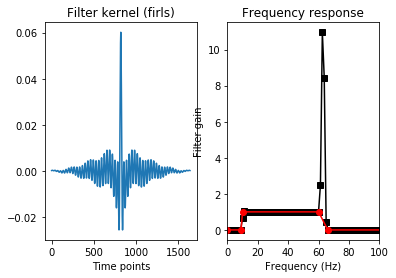

In [3]:
# define filter parameters
lower_bnd = 10 # Hz
upper_bnd = 60 # Hz

transw = .1

samprate  = 2048 # Hz
filtorder = 8*np.round(samprate/lower_bnd)+1

filter_shape = [ 0,0,1,1,0,0 ]
filter_freqs = [ 0, lower_bnd*(1-transw), lower_bnd, upper_bnd, upper_bnd+upper_bnd*transw, samprate/2 ]

filterkern = signal.firls(filtorder,filter_freqs,filter_shape,fs=samprate)
hz = np.linspace(0,samprate/2,int(np.floor(len(filterkern)/2)+1))
filterpow = np.abs(np.fft.fft(filterkern))**2


## plots
plt.subplot(121)
plt.plot(filterkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')

# plot amplitude spectrum of the filter kernel
plt.subplot(122)
plt.plot(hz,filterpow[:len(hz)],'ks-')
plt.plot(filter_freqs,filter_shape,'ro-')

plt.xlim([0,upper_bnd+40])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.title('Frequency response')
plt.show()

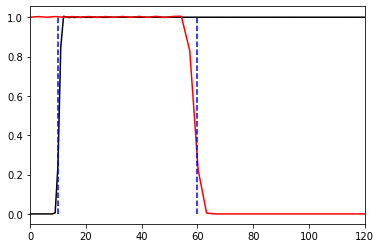

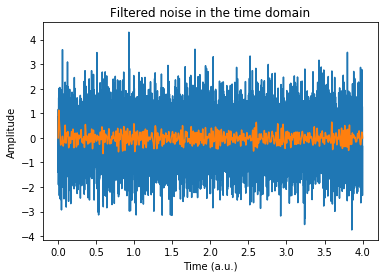

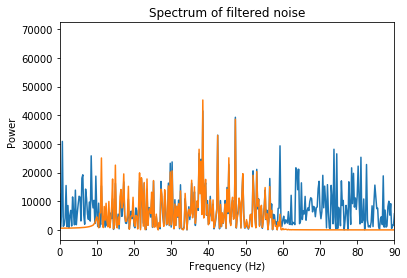

In [5]:
## generate white noise signal
N = samprate*4
noise = np.random.randn(N)
timevec = np.arange(0,len(noise))/samprate


## the better way to filter...


### first apply a high-pass filter
forder = int(10*samprate/lower_bnd)+1
filtkern = signal.firwin(forder,lower_bnd,pass_zero=False,fs=samprate)

# spectrum of kernel
hz = np.linspace(0,samprate/2,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(np.fft.fft(filtkern))**2
plt.plot(hz,filterpow[:len(hz)],'k')

# zero-phase-shift filter with reflection
fnoise = signal.filtfilt(filtkern,1,noise)



### repeat for low-pass filter
forder = 20*int(samprate/upper_bnd)+1
filtkern = signal.firwin(forder,upper_bnd,fs=samprate,pass_zero=True)

# spectrum of kernel
hz = np.linspace(0,samprate/2,int(np.floor(len(filtkern)/2)+1))
filterpow = np.abs(np.fft.fft(filtkern))**2

plt.plot(hz,filterpow[:len(hz)],'r')
plt.plot([lower_bnd, lower_bnd],[0,1],'b--')
plt.plot([upper_bnd, upper_bnd],[0,1],'b--')
plt.xlim([0,upper_bnd*2])

plt.show()


## now filter the filtered signal
fnoise = signal.filtfilt(filtkern,1,fnoise)


# make some plots
plt.plot(timevec,noise,label='noise')
plt.plot(timevec,fnoise,label='filtered noise')
plt.xlabel('Time (a.u.)')
plt.ylabel('Amplitude')
plt.title('Filtered noise in the time domain')
plt.show()


# plot power spectrum
noiseX  = np.abs(np.fft.fft(noise))**2
fnoiseX = np.abs(np.fft.fft(fnoise))**2
hz = np.linspace(0,samprate,len(fnoise))

plt.plot(hz,noiseX,label='Noise')
plt.plot(hz,fnoiseX,label='Filtered noise')
plt.xlim([0,upper_bnd*1.5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Spectrum of filtered noise')
plt.show()
